In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt

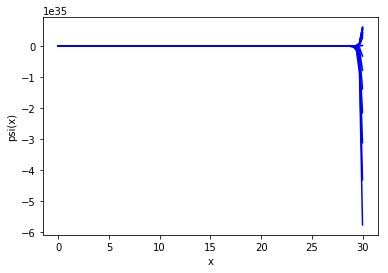

In [ ]:
E0 = 10 # constant energy
E1 = 10.5
iterations = 20

E = np.linspace(E0,E1,iterations)
y0 = [0.0, 1.0] # inital psi and psi'
l = 30
x = np.linspace(0, l, 101) # position

# time-independent schroedinger's equation with semi-infinite V
def tise(y, x, E):
    psi, u = y # u is d/dx*psi
    dydx = [u, 2*(x*psi - E*psi)]
    return dydx

# numerical solution of TISE
psi_l = np.zeros(iterations)
for i in range(iterations):
    sol = odeint(tise, y0, x, args=(E[i],))
    # plot psi over psi'
    plt.plot(x, sol[:, 0], 'b', label='$\Psi$')
    #plt.plot(x, sol[:, 1], 'g', label="$\dot{\Psi}$")
    psi_l[i] = sol[-1,0]


#plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('psi(x)')

plt.show()

plt.clf()
plt.plot(E,psi_l)
plt.show()


def getFcn(l):
    def fcn(E):
        x = np.linspace(0,l,101)
        psi = odeint(tise, y0, x, args=(E,))
        return psi[-1,0]
    return fcn

#fcn = getFcn(E0,10)

num_l = 1
roots = np.zeros(num_l)
for i in range(num_l):
    roots[i] = bisect(getFcn(l*i/num_l), E0,E1)
    
plt.clf()
plt.plot(np.linspace(0,l,num_l), roots)
plt.show()